In [1]:
import collections
from typing import Optional, List
import heapq

# NOTES

### general notes
1. problems denoted by * proved to be quite challenging for me upon first attempt
2. problems denoted by ** are exceedingly challenging and will require a lot of revision
3. problems denoted by @ remain incomplete
4. in leetcode, problems with notes in green are first attempts/solutions or reworks after failure. those with notes in blue are review

### study notes

# 5b. Backtracking

### 78. Subsets (medium)*

Given an integer array nums of unique elements, return all possible 
subsets
 (the power set).

The solution set must not contain duplicate subsets. Return the solution in any order.

In [5]:
# attempt

class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        res = [[]]

        for i in range(len(nums)):
            if [nums[i]] not in res:
                res.append([nums[i]])
            full = [nums[i]]
            for j in range(i+1, len(nums)):
                temp = [nums[i], nums[j]]
                if temp not in res:
                    res.append(temp)
                full.append(nums[j])
            if full not in res:
                res.append(full)

        return res

# status = failure
# NOTE: attempted brute force

In [19]:
# solution -> backtracking
# time complexity: O(n * 2^n)
# space complexity: O(n)

class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        res = []

        subset = []

        def dfs(i):
            # base case: index is out of bounds and we end the recursion. this is also when the subset is appended to our result
            if i >= len(nums):
                res.append(subset.copy())
                return
            # decision to include nums[i]. this can be considered the "left" decision in the image
            subset.append(nums[i])
            dfs(i + 1)
            # decision not to include nums[i]. this can be considered the "right decision in the image
            subset.pop()
            dfs(i + 1)

        dfs(0)
        return res

#### explanation

my own: the code for this problem is fairly straightforward and so is the intuition, but backtracking as a whole seems difficult to grasp... might take some time to wrap head around it.

essentially we want to build subsets while going through every number using the index, and at each number we have to decide whether we add the current number to the subset or move on without adding it. we do this using a dfs recursive function. below is a visual representation of what happens in that function. this is exactly what the code does as explained by the comments, with the addition of the base case: when our current index is out of bounds, we end the recursion in a given path and append to our result the subset that was built in this path (in this case we don't really need to return anything because our res list is being modified through the function and is available in the outer function). once the dfs function has run to completion, we can simply return our res list.

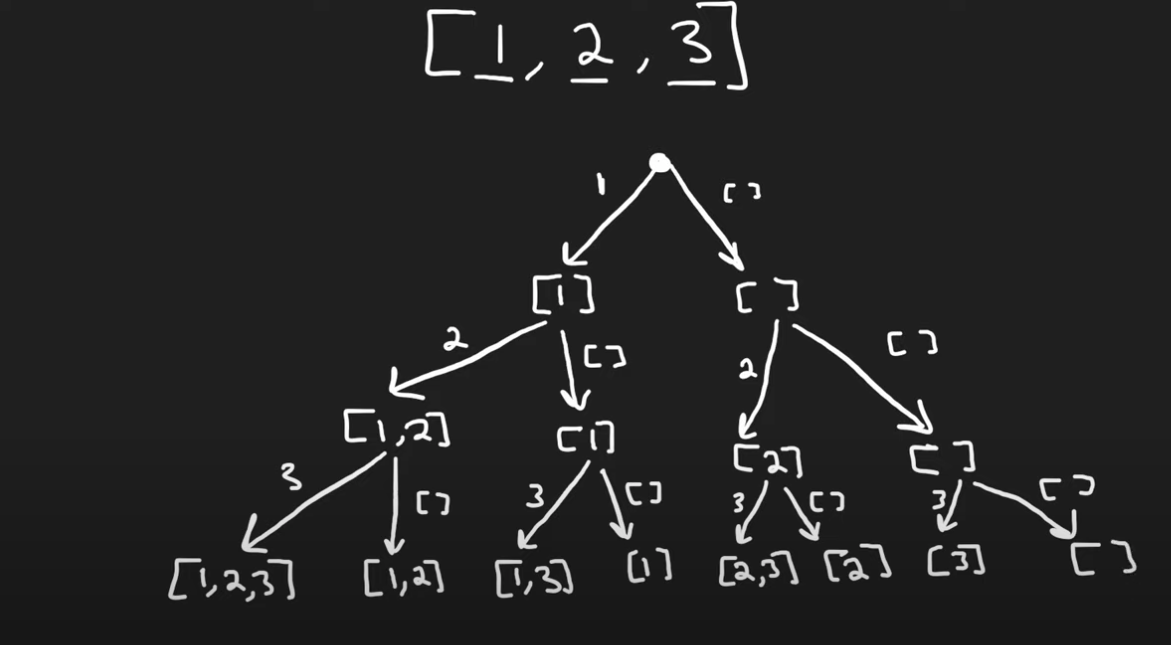

here's a youtube comment giving the play by play of the recursive calls (this one only really explains the left tree):

Let's say we have the list nums = [1, 2, 3] and we call the dfs function with i = 0.

The first call: dfs(0):
The condition i >= len(nums) is false, so we move forward.
nums[0] is appended to subset which is now [1].
A new call is made to dfs(1).

The second call: dfs(1):
The condition i >= len(nums) is false, so we move forward.
nums[1] is appended to subset which is now [1, 2].
A new call is made to dfs(2).

The third call: dfs(2):
The condition i >= len(nums) is false, so we move forward.
nums[2] is appended to subset which is now [1, 2, 3].
A new call is made to dfs(3).

The fourth call: dfs(3):
The condition i >= len(nums) is true, so the current subset [1, 2, 3] is appended to the res list.
The function returns.

The third call returns:
nums[2] is removed from subset which is now [1, 2].
A new call is made to dfs(3).

The fifth call: dfs(3):
The condition i >= len(nums) is true, so the current subset [1, 2] is appended to the res list.
The function returns.

The second call returns:
nums[1] is removed from subset which is now [1].
A new call is made to dfs(2).

The sixth call: dfs(2):
The condition i >= len(nums) is false, so we move forward.
nums[2] is appended to subset which is now [1, 3].
A new call is made to dfs(3).

The seventh call: dfs(3):
The condition i >= len(nums) is true, so the current subset [1, 3] is appended to the res list.
The function returns.

The sixth call returns:
nums[2] is removed from subset which is now [1].
A new call is made to dfs(3).

The eighth call: dfs(3):
The condition i >= len(nums) is true, so the current subset [1] is appended to the res list.

here's another version as explained by chatGPT

Let’s assume nums = [1, 2] as an example to make it concrete. Here’s how the recursive stack behaves:

1. Initial Call: dfs(0)

State: i = 0, subset = [].
The first decision (include nums[0]) is taken:
subset = [1]
Recursive Call: dfs(1).

2. Second Call: dfs(1)

State: i = 1, subset = [1].
The first decision (include nums[1]) is taken:
subset = [1, 2]
Recursive Call: dfs(2).

3. Third Call: dfs(2)

State: i = 2, subset = [1, 2].
Base case is reached (i >= len(nums)):
res = [[1, 2]] (add a copy of subset to res).
Return to the previous call (dfs(1)).

4. Back to Second Call: dfs(1)

State: Backtracking after including nums[1].
The second decision (exclude nums[1]) is taken:
subset = [1] (undo subset.append(nums[1]) via subset.pop()).
Recursive Call: dfs(2).

5. Fourth Call: dfs(2)

State: i = 2, subset = [1].
Base case is reached:
res = [[1, 2], [1]].
Return to the previous call (dfs(0)).

6. Back to Initial Call: dfs(0)

State: Backtracking after including nums[0].
The second decision (exclude nums[0]) is taken:
subset = [] (undo subset.append(nums[0]) via subset.pop()).
Recursive Call: dfs(1).

7. Fifth Call: dfs(1)

State: i = 1, subset = [].
The first decision (include nums[1]) is taken:
subset = [2].
Recursive Call: dfs(2).

8. Sixth Call: dfs(2)

State: i = 2, subset = [2].
Base case is reached:
res = [[1, 2], [1], [2]].
Return to the previous call (dfs(1)).

9. Back to Fifth Call: dfs(1)

State: Backtracking after including nums[1].
The second decision (exclude nums[1]) is taken:
subset = [].
Recursive Call: dfs(2).

10. Seventh Call: dfs(2)

State: i = 2, subset = [].
Base case is reached:
res = [[1, 2], [1], [2], []].
Return to the previous call (dfs(1)).

11. End: 

All recursive calls are complete, and res contains all subsets.

### 39. Combination Sum (medium)**

Given an array of distinct integers candidates and a target integer target, return a list of all unique combinations of candidates where the chosen numbers sum to target. You may return the combinations in any order.

The same number may be chosen from candidates an unlimited number of times. Two combinations are unique if the 
frequency
 of at least one of the chosen numbers is different.

The test cases are generated such that the number of unique combinations that sum up to target is less than 150 combinations for the given input.

In [14]:
# attempt

class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
        # idea: start with continously adding the same number first until you reach/get past target. then delete last number and replace the number previous to the deleted one, and go back to adding continuously until you reach/get past target
        candidates.sort()
        
        res = []

        subset = []

        def dfs(i):
            # base case: end recursion
            if i >= len(candidates):
                return
            
            subset.append(candidates[i])
            if sum(subset) == target and subset not in res:
                res.append(subset.copy())
                return
            # keep adding the same number until you're past the target
            elif sum(subset) <= target:
                dfs(i)
            # delete a number and change to different number once, then go back to continously adding the same number
            subset.pop()
            dfs(i + 1)
        dfs(0)
        return res
    
# status = failure

In [18]:
# solution
# time complexity: O(2^(t/m))
# space complexity: O(t/m)

class Solution:
    def combinationSum(self, nums: List[int], target: int) -> List[List[int]]:
        res = []

        def dfs(i, cur, total):
            if total == target:
                res.append(cur.copy())
                return
            if i >= len(nums) or total > target:
                return

            cur.append(nums[i])
            # decision 1
            dfs(i, cur, total + nums[i])
            # decision 2
            cur.pop()
            dfs(i + 1, cur, total)

        dfs(0, [], 0)
        return res

#### explanation

my own: the intuition behind this solution is once again somewhat straightforward and is shown visually in the image below, **but i am unsure how the process itself ensures our solution does not contain any duplicates and there is no need to check if a certain subset exists in our result array, which is the tough part**. however the easy part about this problem is that every recursion step there are only two decisions (not counting finding a solution or reaching the base case): continue the recursion with the same number and keep adding to the total, or move your i pointer to the next number. **also note that this explanation is quite bad at this time since haven't quite wrapped my head around backtracking.**

this problem uses an inner dfs recursive function again, which looks common across backtracking problems. this time the dfs function keeps track of 3 things: "i" which is a pointer for which number we're allowed to add in a recursion, "cur" which is an array containing the current list of numbers, and "total" which is the sum of the numbers in cur.

the two base cases are fairly straightforward:
1. if we find an answer and total == target -> we can add this list (which is cur in the code) to our result list and end the recursion with return
2. our pointer is out of bounds OR the total is greater than the target -> no result found so we end the recursion using return

the main step is this: start with adding the number at index i from our candidates list (starting at index 0 in the first call) to our cur list (which will now contain only 1 element in the first call).

then there are the two decisions:
1. repeat this same step with the same number and add to your total. if our input list is [2,3,6,7] then the call will look like: dfs(i = 0, cur = [2], total = 0 + 2)
2. remove the number just added, and go into the next recursion with the next number, incrementing your pointer by 1 (i + 1) and leaving your total unchanged. if our input list is [2,3,6,7] the call will look like: dfs(i = 0 + 1, cur = [], total = 0)

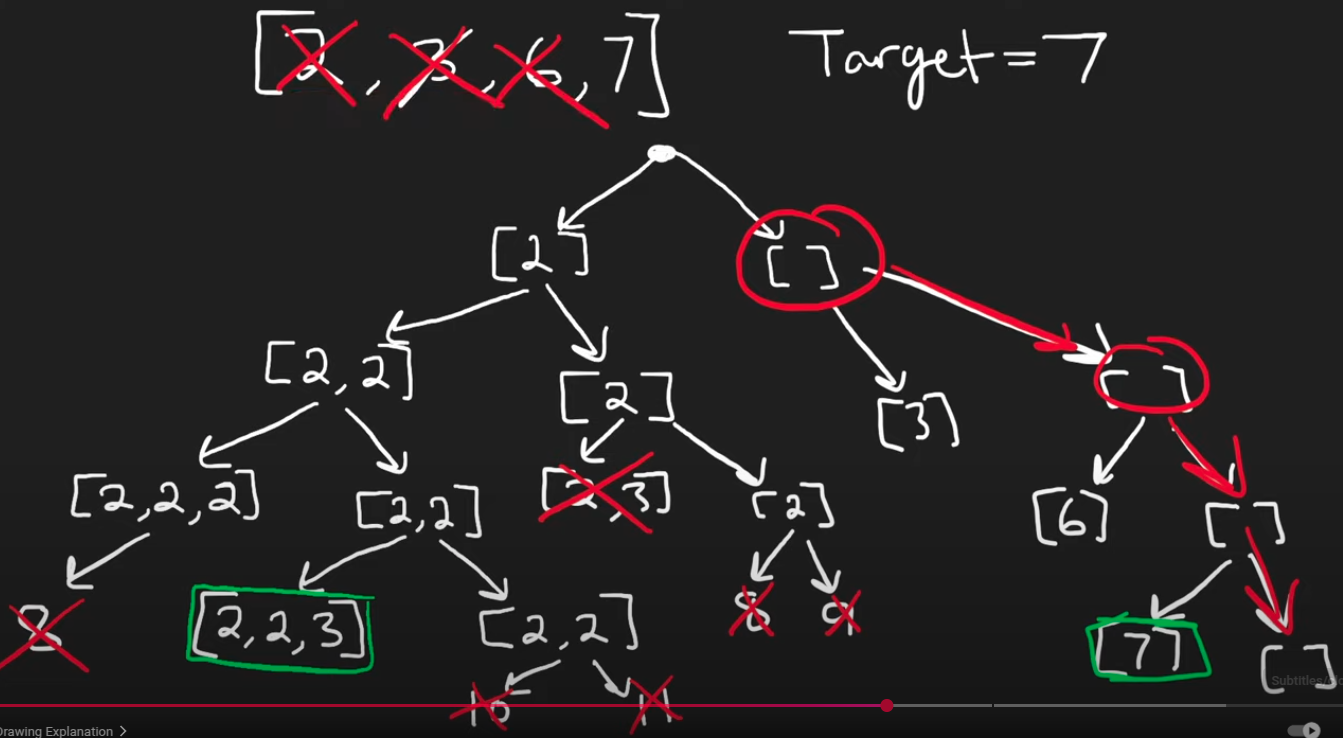

### 40. Combination Sum II (medium)*

Given a collection of candidate numbers (candidates) and a target number (target), find all unique combinations in candidates where the candidate numbers sum to target.

Each number in candidates may only be used once in the combination.

Note: The solution set must not contain duplicate combinations.

In [9]:
# attempt
class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        candidates.sort()

        res = []

        def dfs(i, cur, total):
            if total == target and cur not in res:
                res.append(cur.copy())
                return
            if i >= len(candidates) or total > target:
                return

            cur.append(candidates[i])
            # keep current numbers and add following ones
            dfs(i+1, cur, total + candidates[i])
            # backtrack
            cur.pop()
            dfs(i+1, cur, total)


        dfs(0, [], 0)
        return res
    
# status = failure
# NOTE: it actually works but getting TLE (passing 172/176 test cases)

In [2]:
# solution
# time complexity: O(n * 2^n)
# space complexity: O(n)

class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        res = []
        candidates.sort()

        def dfs(i, cur, total):
            # optimization makes it so there's also no duplicate combinations
            if total == target:
                res.append(cur.copy())
                return
            if total > target or i == len(candidates):
                return
            
            # include candidates[i]
            cur.append(candidates[i])
            dfs(i + 1, cur, total + candidates[i])
            # skip candidates[i]
            cur.pop()
            # optimization needed to avoid the TLE and duplicates; this is where the sorting is necessary
            while i + 1 < len(candidates) and candidates[i] == candidates[i+1]:
                i += 1
            dfs(i + 1, cur, total)
            
        dfs(0, [], 0)
        return res

#### explanation

my own: i was actually quite close to the a working solution, but my backtracking portion needed additional logic to work. this problem is very similar to problem 39. -> almost the same logic and intuition can be used. a small detail worth mentioning is that for this problem you do want to sort your input list before doing the recursion, which is important to avoid duplicate combinations.

once again you are using a recursive dfs function which keeps track of 3 things: "i" which is the pointer, "cur" which is a list of your list of current numbers, and "total" which is the sum of the numbers in cur. there is also two possible decisions each recursion. after adding a number to your cur list, you can either decide to:
1. add the next number by incrementing your pointer and adding to the total
2. remove the number just added and go to the next number

this is very similar as question 39. except this time your incrementing your i pointer for both decision. there is also an optimization needed to avoid getting a TLE on leetcode: in your backtracking section, after removing the number that was just added, you need a while loop that increments your pointer until the next number is different from the one that was just removed (which makes sense since if you've got a working combination you don't want the same combination with the same number at a different index, and if the previous combination didn't work readding the same number from a different index also won't produce a valid result)

### 46. Permutations (medium)**

Given an array nums of distinct integers, return all the possible permutations. You can return the answer in any order.

In [3]:
# attempt

class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        res = []

        def dfs(i, cur):
            if i >= len(nums):
                res.append(cur.copy())
                return

            # what are the decisions?
            # include current number
            cur.append(nums[i])
            dfs(i+1, cur)
            # how to include next number? or swap current with last?
            # can't just pop
        
        dfs(0, [])
        return res
    
# status = failure

In [4]:
# solution -> recursive
# time complexity: O(n! * n^2)
# space complexity: O(n! * n)

class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        if len(nums) == 0:
            return [[]]
        
        perms = self.permute(nums[1:])
        res = []
        for p in perms:
            for i in range(len(p) + 1):
                p_copy = p.copy()
                p_copy.insert(i, nums[0])
                res.append(p_copy)
        return res

In [6]:
# solution -> iterative
# time complexity: O(n! * n^2)
# space complexity: O(n! * n)

class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        perms = [[]]
        for num in nums:
            new_perms = []
            for p in perms:
                for i in range(len(p) + 1):
                    p_copy = p.copy()
                    p_copy.insert(i, num)
                    new_perms.append(p_copy)
            perms = new_perms
        return perms

In [7]:
# solution -> backtracking (optimal)
# time complexity: O(n! * n)
# space complexity: O(n! * n)

class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        self.res = []
        self.backtrack(nums, 0)
        return self.res

    def backtrack(self, nums: List[int], idx: int):
        if idx == len(nums):
            self.res.append(nums[:])
            return
        for i in range(idx, len(nums)):
            nums[idx], nums[i] = nums[i], nums[idx]
            self.backtrack(nums, idx + 1)
            nums[idx], nums[i] = nums[i], nums[idx]

#### explanation

my own: there are many ways of solving this problem but i will focus on iterative solution since it's relatively efficient and there are too many backtracking solutions, each of them are just quite difficult to understand. **will leave this explanation fairly vague for now since this problem was quite a bad one to get better at backtracking...**

the code becomes a lot easier to understand if we look at the drawing explanations, which start the permutations with an empty array, each iteration adding a new number from a different set of permutation, creating a new combination for our result list once all the number have been added. the idea is that from a set of 3 numbers, we have 3 positions to fill in each of our permutations. so for our first number we have 3 choices, for our second number we have 2 choices, and for our last number we only have 1 choice, so there are 3 * 2 * 1 = 6 permutations. we can use this logic and the drawing explanation to write up the iterative solution

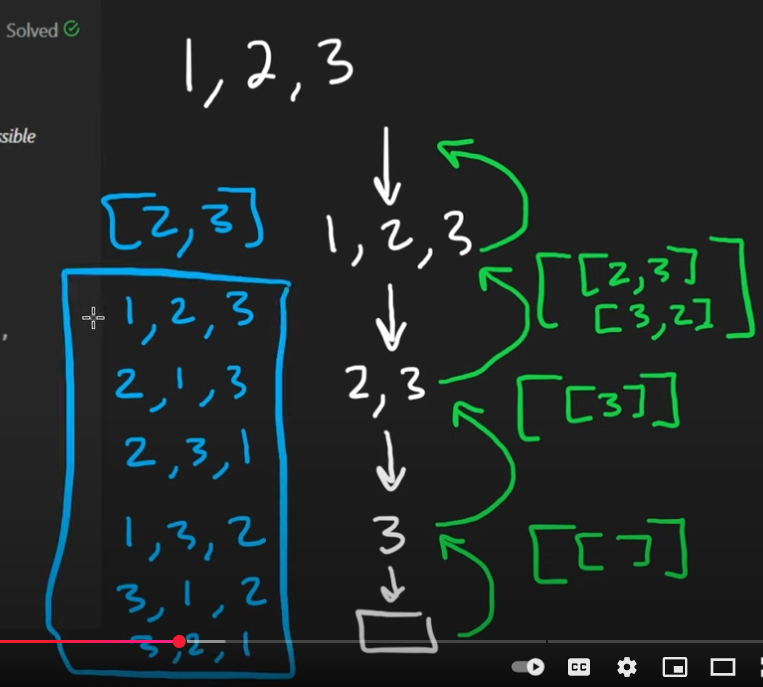

# 6a. Heap / Priority Queue

### 703. Kth Largest Element in a Stream (easy)

You are part of a university admissions office and need to keep track of the kth highest test score from applicants in real-time. This helps to determine cut-off marks for interviews and admissions dynamically as new applicants submit their scores.

You are tasked to implement a class which, for a given integer k, maintains a stream of test scores and continuously returns the kth highest test score after a new score has been submitted. More specifically, we are looking for the kth highest score in the sorted list of all scores.

Implement the KthLargest class:

KthLargest(int k, int[] nums) Initializes the object with the integer k and the stream of test scores nums.
int add(int val) Adds a new test score val to the stream and returns the element representing the kth largest element in the pool of test scores so far.

In [31]:
# attempt

class KthLargest:

    def __init__(self, k: int, nums: List[int]):
        self.scores = nums
        self.k = k

    def add(self, val: int) -> int:
        self.scores.append(val)
        s = sorted(self.scores) # self.scores.sort() <- this gets accepted 
        return s[-(self.k)]     


# Your KthLargest object will be instantiated and called as such:
# obj = KthLargest(k, nums)
# param_1 = obj.add(val)

# status = failure
# NOTE: works but TLE. missing the required data structure; makes sense, first attempt in this section
# NOTE: apparently only TLE because i used sorted() instead of list.sort(). i suppose sorted() was a bad idea anyway because of the unecessary extra space complexity
# NOTE: also tried to sort the nums initially and use binary search after to insert, but my binary insertion sort didn't look correctly implemented 

In [43]:
# solution -> heap
# time complexity: O(m * log k) -> where m is the number of calls made to add()
# space complexity: O(k)

class KthLargest:
    
    def __init__(self, k: int, nums: List[int]):
        self.minHeap, self.k = nums, k   # initialize attributes
        heapq.heapify(self.minHeap)      # turn your list into a heap
        while len(self.minHeap) > k:     # pop until heap is of size k, if it isn't already
            heapq.heappop(self.minHeap)

    def add(self, val: int) -> int:
        heapq.heappush(self.minHeap, val) # add new value to heap
        if len(self.minHeap) > self.k:    # the if statement is described in the note: popping might not be required for the first add which is an edge case
            heapq.heappop(self.minHeap)   # remove minimum element so heap remains of size k
        return self.minHeap[0]            # return the new minimum element after removal

#### explanation

my own: this problem has a lot of different elements to it but when broken down into pieces it is fairly simple. the goal here is to use a minHeap data structure of size k. before we get into why it has to be of size k, we need to understand what a minHeap is. we also need to understand its method and properties to understand how the code works. 

* minHeap is similar to a list but has somewhat of a sort property where we can add and pop to the heap in O(log n), and retrieve the min element in O(1). 
* now why minHeap has to be of size k. we are tasked with retrieving the kth largest element when adding. so for example, if our k = 3 and our nums list is [4,5,8,2], when it is sorted it becomes [2,4,5,8]: at this point the kth largest element aka the 3rd largest element is 4. the value 2 will never be relevant going forward since we will only want to add and keep values in the heap that are equal or greater to the minimum value of our minHeap (which, as mentionned, is 4 initially). if we add a 6, 4 will be removed and our heap will be [6,5,8]. if we add 1, our heap remains [4,5,8]: we can see that the 2 never appears. a visual representation is shown below

now to the code. first is the constructor. we initialize two attributes, minHeap and k that are equal to our inputs nums and k, respectively. then we want to turn our minHeap variable that is originally just a list into an actual heap. from there, if there are more than 3 elements in the heap (nums was originally len(nums) > k), we want to pop the minimum elements until the heap is of size k: we use heapq.heappop() and call it on our heap which pops (and returns) the smallest item from the heap

        self.minHeap, self.k = nums, k
        heapq.heapify(self.minHeap)
        while len(self.minHeap) > k:
            heapq.heappop(self.minHeap)
            
we're now ready to implement the add function. there are multiple ways of doing this but i'll describe the one shown by neetcode. at this point point our heap should be of size k*, and so we simply add the input value using heapq.heappush() and passing 2 arguments: our heap and the value. it doesn't matter what the value is: if it was smaller than our current k largest numbers, it will be removed right away, otherwise it will be kept and some other value will be removed. now we can return the kth largest element. the smallest value in a heap will be at index 0 (due to its inherent sort properties mentionned earlier) and will be the kth largest element because our heap is of size k: we therefore return minHeap[0]

    def add(self, val: int) -> int:
        heapq.heappush(self.minHeap, val)
        if len(self.minHeap) > self.k:    
            heapq.heappop(self.minHeap) 
        return self.minHeap[0]         

note*: there is a subtlety of this problem where nums isn't guaranteed to be of size k originally, but once the first add is performed our list is guaranteed to be at least of size k, which is why we need the if statement instead of just popping right away


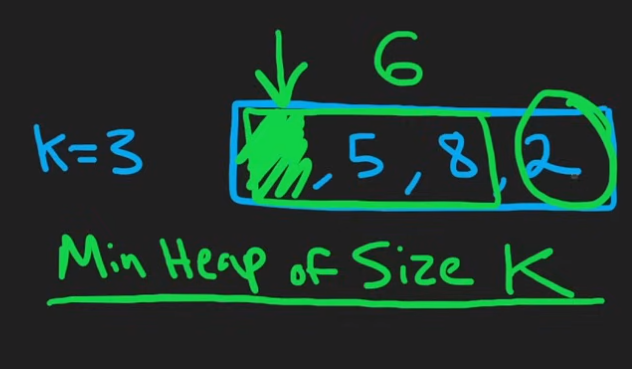

doc for heapq: https://docs.python.org/3/library/heapq.html

follow up: can you find a different ways to implement the add (still using heap?)

In [61]:
class KthLargest:

    def __init__(self, k: int, nums: List[int]):
        pass
        
    def add(self, val: int) -> int:
        pass

In [59]:
# some tests
lst = [4,7,3,8,10]
heapq.heapify(lst)
lst

[3, 7, 4, 8, 10]

### 1046. Last Stone Weight (easy)

You are given an array of integers stones where stones[i] is the weight of the ith stone.

We are playing a game with the stones. On each turn, we choose the heaviest two stones and smash them together. Suppose the heaviest two stones have weights x and y with x <= y. The result of this smash is:

* If x == y, both stones are destroyed, and
* If x != y, the stone of weight x is destroyed, and the stone of weight y has new weight y - x.

At the end of the game, there is at most one stone left.

Return the weight of the last remaining stone. If there are no stones left, return 0.

In [50]:
# attempt

class Solution:
    def lastStoneWeight(self, stones: List[int]) -> int:
        # how can i most efficiently retrieve the max 2 values/sort the array?
        # apparently i can't have a heap that pops the biggest value? that's what i wanted to use
        
        while len(stones) >= 2:
            stones.sort()
            max1 = stones.pop(-1)
            max2 = stones.pop(-1)

            if max1 < max2:
                stones.append(max2 - max1)
            elif max1 > max2:
                stones.append(max1 - max2)
            
        if stones:
            return stones[0]
        return 0

# status = success
# NOTE: wasn't obvious to me what the time complexity was for this, which is shown right below
# NOTE: also uncessary if statements: max1 can only be greater or equal to max2

In [41]:
# solution -> same as mine but written way nicer
# time complexity: O(n^2logn)
# space complexity: O(1) or O(n) depending on sorting algorithm

class Solution:
    def lastStoneWeight(self, stones: List[int]) -> int:
        
        while len(stones) > 1:
            stones.sort()
            cur = stones.pop() - stones.pop()
            if cur:
                stones.append(cur)
                
        return stones[0] if stones else 0

In [55]:
# solution -> heap
class Solution:
    def lastStoneWeight(self, stones: List[int]) -> int:
        stones = [-s for s in stones]      # have to switch their signs, so that heappop() actually returns the biggest original value (which will, technically, after conversion be the smallest number if we think of numbers as smaller as we go torwards -infinity)
        heapq.heapify(stones)

        while len(stones) > 1:             # loop while there is atleast 2 stones in the heap
            first = heapq.heappop(stones)  
            second = heapq.heappop(stones)
            if second > first:                          # if second is greater than first, that means that original value of first actually greater than second. otherwise it means they're equal and are destroyed
                heapq.heappush(stones, first - second)  # if this gets confusing under pressure can always make the code more verbose by using absolute values for the comparison & computation and converting the number back to negative

        stones.append(0)      # append a 0 in case no stones remained
        return abs(stones[0]) # can't have negative weight so we return the absolute value

#### explanation

my own: this problem uses a maxHeap structure which is achieved (in this case?) by reversing all the signs of the original numbers and heapifying the list. then, you want to loop until there is either one or no stones remaining

you get the two "biggest" elements by using heappop() on your heap. typically heappop returns the smallest element but consider what we did before heapifying our list: 
* if our list is [2,7,4,1,8,1], the biggest number is 8. 
* after conversion, the list becomes [-2,-7,-4,-1,-8,-1], the smallest number is -8

once you have those, check if second is greater than first. if they are calculate the result of the impact and heappush it to your heap. this can be slightly confusing at first: if we look at our example, first will be -8 and second -7. thinking in regular arithmetics, -7 (second) is bigger than -8 (first), therefore the if block will trigger. pushed to the heap will be -8 -(-7) = -1. we want our numbers to remain negative so that our maxHeap continues to operate as intended. if second isn't greater than first than that MUST mean they are the same weight, therefore are destroyed and we don't want to push to the heap

to maintain our heap structure, we need to add a 0 to it the end in case there are no remaining stones. then we return the absolute value of the smallest element in the heap, the one at index 0: if they were no stones left, 0 will be returned as it is the only element in the heap. if a stone remained, it's value will still be negative and therefore will be smaller than 0, meaning that this stone will be at index 0 in the heap. we want to return the absolute value because it represents the "original" weight. 

### 973. K Closest Points to Origin (medium)

Given an array of points where points[i] = [xi, yi] represents a point on the X-Y plane and an integer k, return the k closest points to the origin (0, 0).

The distance between two points on the X-Y plane is the Euclidean distance (i.e., √(x1 - x2)2 + (y1 - y2)2).

You may return the answer in any order. The answer is guaranteed to be unique (except for the order that it is in).

In [26]:
# attempt

class Solution:
    def kClosest(self, points: List[List[int]], k: int) -> List[List[int]]:
        # start with an empty max heap
        # has to be max heap because we want to pop the greatest distance when maintaining length of heap
        maxHeap = []
        heapq.heapify(maxHeap)
        # keep track of points and their distance
        # distance : [point]
        hashmap = defaultdict(list)

        # iterate through points, calculate distance -> add to heap
        for point in points:
            x = (0 - point[0]) ** 2
            y = (0 - point[1]) ** 2
          
            distance = math.sqrt(x + y)
            # two different points can have the same distance
            hashmap[distance].append(point)
            heapq.heappush(maxHeap, -distance)

            # keep heap of length k
            if len(maxHeap) > k:
                heapq.heappop(maxHeap)

        res = []
        # go through the distances in the heap, retrieve through pop -> add to result
        # must pop from dict's list to avoid duplicates
        for dist in maxHeap:
            p = hashmap[-dist].pop()
            res.append(p)
        return res
        
# status = success
# NOTE: this works because we can return answer in any order and the answer is guaranteed to be unique (except for the order that it is in)

In [23]:
# solution -> minHeap
# time complexity: O(k * log n)
# space complexity: O(n)

class Solution:
    def kClosest(self, points: List[List[int]], k: int) -> List[List[int]]:
        minHeap = []
        for x, y in points:
            dist = (x ** 2) + (y ** 2)
            minHeap.append([dist, x, y])
        
        heapq.heapify(minHeap)
        res = []
        while k > 0:
            dist, x, y = heapq.heappop(minHeap)
            res.append([x, y])
            k -= 1
            
        return res

#### explanation

my own: this problem becomes much easier when you understand that a Heap, if containing a list of lists, will have it's sorting property based on the first value within the inner list by default (completely removes the need for a hashmap like i used. also really didn't need to use a maxHeap specificially since we don't need keep heap at length k, can easily just use a minHeap - although my approach is apparently more efficient by keeping the heap at length k)

begin by creating an empty list (minHeap), which will become a list of lists, then iterate through the points from your input list, calculating the Euclidean distance for each (the calculation is a lot simpler than i thought, although not sure why in this solution you don't need the square root: it's actually because we just need magnitude and not the distance itself). for each point, append to your list the calculated distance, along with the associated x and y value [distance, x ,y]. after that is done and all distances have been calculated, heapify your list.

initiate another list, your result list, and start a while loop that goes on while k is greater than 0 (each iteration decrements k). in each iteration, pop from your minHeap (it will work correctly because it will pop based on the smallest distance, not looking at x or y), and retrieve the x and y value. append those in a list to your result list [x, y] and decrement k by 1

return result.

In [24]:
# rework -> just simplified the code in my attempt

class Solution:
    def kClosest(self, points: List[List[int]], k: int) -> List[List[int]]:
        # start with an empty minHeap
        minHeap = []
        heapq.heapify(minHeap)
        # keep track of points and their distance
        # distance : [point]
        hashmap = defaultdict(list)

        # iterate through points, calculate distance -> add to heap
        for point in points:
            distance = (point[0] ** 2) + (point[1] ** 2)
            # two different points can have the same distance
            hashmap[distance].append(point)
            heapq.heappush(minHeap, distance)

        # go through the distances in the heap, retrieve through pop -> add to result
        # must pop from dict's list to avoid duplicates
        res = []
        while k > 0:
            dist = heapq.heappop(minHeap)
            p = hashmap[dist].pop()
            res.append(p)
            k -= 1

        return res

### 215. Kth Largest Element in an Array (medium)

Given an integer array nums and an integer k, return the kth largest element in the array.

Note that it is the kth largest element in the sorted order, not the kth distinct element.

Can you solve it without sorting?

In [20]:
# attempt
# time complexity: O(n + klogn)
# space complexity: O(n)

class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        maxHeap = [-i for i in nums]
        heapq.heapify(maxHeap)
        res = None

        while k > 0:
            res = -(heapq.heappop(maxHeap))
            k -= 1

        return res
    
# status = success
# NOTE: am i missing something? too easy

In [18]:
# solution
class Solution:
    def findKthLargest(self, nums, k):
        return heapq.nlargest(k, nums)[-1] # the -1 indexing is explained by the code below the explanation

#### explanation

my own: the first solution can just be explained by the documentation of heapq:

heapq.nlargest(n, iterable, key=None)

    Return a list with the n largest elements from the dataset defined by iterable. key, if provided, specifies a function of one argument that is used to extract a comparison key from each element in iterable (for example, key=str.lower). Equivalent to: sorted(iterable, key=key, reverse=True)[:n].

In [17]:
inst = Solution()
test = [4,7,2,3,8,5]

res = inst.findKthLargest(test, 3)
res

5

In [19]:
heapq.heapify(test)
heapq.nlargest(3, test)

[8, 7, 5]

In [27]:
# solution -> quick select
# time complexity: O(n) on average, O(n**2) worst case
# space complexity: O(n)

class Solution:

    def findKthLargest(self, nums: List[int], k: int) -> int:
        k = len(nums) - k
        
        def quickSelect(l, r):
            pivot, p = nums[r], l
            for i in range(l, r):
                if nums[i] <= pivot:
                    # swapping
                    nums[p], nums[i] = nums[i], nums[p]
                    p += 1
                             # this nums[r] is actually equal to pivot value at this point
            nums[p], nums[r] = nums[r], nums[p]

            if p > k: 
                return quickSelect(l, p - 1)
            elif p < k:
                return quickSelect(p + 1, r)
            else:
                return nums[p]

        return quickSelect(0, len(nums) - 1)
    
# NOTE: this is just to learn. this actually triggers a TLE on leetcode

this problem is actually about the <u>quick select</u> recursive algorithm (which will be explained below) since nlargest method is equivalent to sorted

generally speaking, quick select will choose a value from the array which will act as our "pivot" and will use it to partition the array in 2 halves. the way the array is partioned is every value to the left will be smaller than the pivot, and every value to the right will be greater than the pivot (note that each partition are not necessarily sorted, they must just fit the condition just described). in this case the algorithm iterates through the range of the array and uses a pointer which represents at index (at the very beginning starts at index 0) that increments by 1 every time it finds a lower or equal to the pivot. [swapping happens]. if at the end of the loop the pointer is at an index equal to len(nums) - k (k elements from the end of the array), that means you have found the kth largest value: the value at the index of the pointer. otherwise the recursion start and you must call quick select again and adjust your ranges. the way the ranges work is similar to how binary search operates, where you will only want to look at one of the partition depending on which of the if statement was triggered (this doesn't apply to the else statement in the code, that means you found your answer)

### 621. Task Scheduler (medium)**

You are given an array of CPU tasks, each labeled with a letter from A to Z, and a number n. Each CPU interval can be idle or allow the completion of one task. Tasks can be completed in any order, but there's a constraint: there has to be a gap of at least n intervals between two tasks with the same label.

Return the minimum number of CPU intervals required to complete all tasks.

In [15]:
# attempt

class Solution:
    def leastInterval(self, tasks: List[str], n: int) -> int:
        queue = [[0, t] for t in tasks]
        heapq.heapify(queue)

        intervals = 0
        while queue:
            # if first item in queue is ready to go
            if queue[0][0] == 0:   
                task = heapq.heappop(queue)
                for t in queue:
                    if t[1] == task[1]:
                        t[0] = n+1
            # reduce cooldown
            for t in queue:
                if t[0] != 0:
                    t[0] -= 1
            # keep the heap structure after modifications
            heapq.heapify(queue)

            intervals += 1

        return intervals
    
# status = failure
# NOTE: doesn't quite work... but close. doesn't reliably return the minimum interval
# NOTE: needed some logic to prioritize the most frequent tasks first, not just whatever task is ready

In [28]:
# solution
class Solution:
    def leastInterval(self, tasks: List[str], n: int) -> int:
        count = Counter(tasks)
        maxHeap = [-cnt for cnt in count.values()]
        heapq.heapify(maxHeap)

        time = 0
        q = deque()  # pairs of [-cnt, idleTime]
        while maxHeap or q:
            time += 1

            # if there are no items in the maxHeap we need to idle (meaning there are no tasks ready to be run)
            # by grabbing the time of the next task ready to be run, we can skip idle iterations
            if not maxHeap:
                time = q[0][1]
            else:
                # this else block actually symbolizes a task being processed
                # the count is incremented by 1 since we're using a maxHeap in python: the sign of each count has been reversed since python doesn't actually have a maxHeap
                cnt = 1 + heapq.heappop(maxHeap)
                # don't append back into q if the count is at 0
                if cnt:
                    # we take the current time + the cooldown value to know when the task will be ready to be run again
                    q.append([cnt, time + n])
            # if the first task's time in the q is equal to the current time it means it's ready to be ran and can be placed back in the maxHeap
            if q and q[0][1] == time:
                heapq.heappush(maxHeap, q.popleft()[0])
        return time

In [18]:
# example of Counter
tasks = ['A', 'A', 'B', 'C']
count = collections.Counter(tasks)
count

Counter({'A': 2, 'B': 1, 'C': 1})

#### explanation

my own: this problem is actually quite tough, and the solution is not very intuitive because we keep track of the count of each task instead of the letters themselves (which was the logic my solution was missing to find the smallest interval possible). as a result i will explain the intuition instead of the code itself. the code will have comments that will supplement the explanation. 

to keep track of the count of a task and when this task is ready, we use both a maxHeap which will only store the count of a task (and will actually be what we use to "process" tasks) and a queue which will store a list of lists, each list containing the count of a task and the time when it will be ready to be run. then we will start a while loop that goes on while there are items in our maxHeap or our queue. we know if a task is ready to be run by keeping track of the current time using a time variable initialized at 0 before the loop starts, incrementing it by 1 each iteration: when a task is processed (at the beginning, every task is ready to be processed therefore we want to take the task with the greatest count), we use our queue to put it back in (unless the task count is now at 0), this time updating when it's ready to be run by using current time + n (which is the cooldown period). if the task's time is equal to the current time, it's ready to be processed. when there are no more items in both our maxHeap and our queue it means all tasks have been processed and we can return the time which will represent the intervals that occured.

### 355. Design Twitter (medium)

Design a simplified version of Twitter where users can post tweets, follow/unfollow another user, and is able to see the 10 most recent tweets in the user's news feed.

Implement the Twitter class:

* Twitter() Initializes your twitter object.
* void postTweet(int userId, int tweetId) Composes a new tweet with ID tweetId by the user userId. Each call to this function will be made with a unique tweetId.
* List<Integer> getNewsFeed(int userId) Retrieves the 10 most recent tweet IDs in the user's news feed. Each item in the news feed must be posted by users who the user followed or by the user themself. Tweets must be ordered from most recent to least recent.
* void follow(int followerId, int followeeId) The user with ID followerId started following the user with ID followeeId.
* void unfollow(int followerId, int followeeId) The user with ID followerId started unfollowing the user with ID followeeId.

In [45]:
# attempt

class Twitter:

    def __init__(self):
        # what does users need? an id, a list of tweets, a list of following
        self.users = defaultdict(lambda: {'tweets': [], 'following': []})
        self.time = 1
        

    def postTweet(self, userId: int, tweetId: int) -> None:
        self.users[userId]['tweets'].append([time, tweetId])
        self.time += 1

    def getNewsFeed(self, userId: int) -> List[int]:
        lst = self.users[userId]['tweets']
        for following in self.users[userId]['following']:
            lst = lst + (self.users[following]['tweets'])
        heapq.heapify(lst)
        res = []
        while lst and len(res) <= 10:
            tweet = heapq.heappop(lst)
            res.append(tweet[1])
        return res

    def follow(self, followerId: int, followeeId: int) -> None:
        self.users[followerId]['following'].append(followeeId)

    def unfollow(self, followerId: int, followeeId: int) -> None:
        self.users[followerId]['following'].remove(followeeId)

# status = failure
# NOTE: the getNewsFeed isn't behaving how i am expecting it too, i believe it is modifying the users dictionary itself which it isn't supposed to
# NOTE: also i was getting the oldest tweets instead of most recent using my heap
# NOTE: my way of handling follows and unfollows was also not the best, set would've been better since we can't follow the same person twice

In [56]:
# attempt 2

class Twitter:

    def __init__(self):
        # what does users need? an id, a list of tweets, a list of following
        self.users = defaultdict(lambda: {'tweets': [], 'following': set()})
        self.time = 1
        

    def postTweet(self, userId: int, tweetId: int) -> None:
        self.users[userId]['tweets'].append([self.time, tweetId])
        self.time -= 1 # decrement because we want the getNewsFeed() method to get most recent tweets, not oldest

    def getNewsFeed(self, userId: int) -> List[int]:
        temp = self.users[userId]['tweets'] # need this temp list and iterate through it to begin building our heap to avoid modifying self.users
        heap = []
        for tweets in temp:
            heap.append(tweets)
        for following in self.users[userId]['following']:
            heap = heap + (self.users[following]['tweets'])
        heapq.heapify(heap)
        res = []
        while heap and len(res) < 10:
            tweet = heapq.heappop(heap)
            res.append(tweet[1])
        return res

    def follow(self, followerId: int, followeeId: int) -> None:
        self.users[followerId]['following'].add(followeeId)

    def unfollow(self, followerId: int, followeeId: int) -> None:
        if followeeId in self.users[followerId]['following']:
            self.users[followerId]['following'].remove(followeeId)
            
# status = success

In [49]:
# example of how users work
users = collections.defaultdict(lambda: {'tweets': [], 'following': set()})
users[1]['tweets'].append(1)
users[1]['tweets'].append(3)
users[2]['tweets'].append(5)
users[2]['following'].add(1)
users

defaultdict(<function __main__.<lambda>()>,
            {1: {'tweets': [1, 3], 'following': set()},
             2: {'tweets': [5], 'following': {1}}})

In [50]:
# solution
# time complexity: O(n) for each getNewsFeed() call and O(1) for remaining methods
# space complexity: O(N * m + N * M + n) -> where n is the total number of followeeIds associated with the userId, m is the maximum number of tweets by any users, ...
# ... N is the total number of userIds and M is the maximum number of followees for any users

class Twitter:
    def __init__(self):
        self.count = 0
        self.tweetMap = defaultdict(list)  # userId -> list of [count, tweetIds]
        self.followMap = defaultdict(set)  # userId -> set of followeeId

    def postTweet(self, userId: int, tweetId: int) -> None:
        self.tweetMap[userId].append([self.count, tweetId])
        self.count -= 1

    def getNewsFeed(self, userId: int) -> List[int]:
        res = [] # ordered starting from recent
        minHeap = []

        self.followMap[userId].add(userId)
        for followeeId in self.followMap[userId]:
            if followeeId in self.tweetMap:
                index = len(self.tweetMap[followeeId]) - 1
                count, tweetId = self.tweetMap[followeeId][index]
                heapq.heappush(minHeap, [count, tweetId, followeeId, index - 1])

        while minHeap and len(res) < 10:
            count, tweetId, followeeId, index = heapq.heappop(minHeap)
            res.append(tweetId)
            if index >= 0:
                count, tweetId = self.tweetMap[followeeId][index]
                heapq.heappush(minHeap, [count, tweetId, followeeId, index - 1])
        return res

    def follow(self, followerId: int, followeeId: int) -> None:
        self.followMap[followerId].add(followeeId)

    def unfollow(self, followerId: int, followeeId: int) -> None:
        if followeeId in self.followMap[followerId]:
            self.followMap[followerId].remove(followeeId)

#### explanation

my own: i won't go into too much detail about the neetcode solution because what it does is very very similar as my solution (potentially more optimized - hard to tell), but my code is self explanatory and easier to read in my opinion, and performance seems quite similar. the main difference between my second attempt and the neetcode solution is that the users dictionnary i used is split into a tweetMap and followMap. postTweet(), follow(), and unfollow() basically are the same but with the corresponding maps. getNewsFeed() operates differently because a slightly different strategy is used to get most recent tweets and a few other variables are tracked, but it has the same idea as my method by getting the 10 most recent tweets using a minHeap and storing them in a res list, returning that list when either the heap is empty or the list has 10 tweets.

# 6c. 1-D Dynamic Programming

# 7. Greedy